<a href="https://colab.research.google.com/github/Renita1206/Machine-Learning-Models/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the Dataset

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=e460faf043cebabdfecd6601da51eac69f646bffe5b5713f6cc56b2dba450e42
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bluecoder1206","key":"68dcf0f9521940e72f2268bd6739a6e9"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d pavlofesenko/titanic-extended

  0% 0.00/134k [00:00<?, ?B/s]
100% 134k/134k [00:00<00:00, 49.3MB/s]


In [ ]:
!unzip titanic-extended.zip -d dataset

Archive:  titanic-extended.zip
  inflating: dataset/full.csv        
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


# Working with the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("/content/dataset/full.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


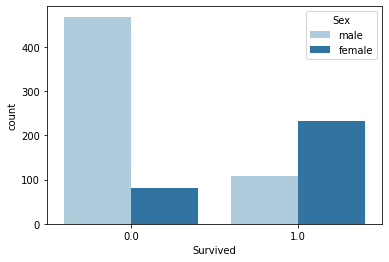

In [ ]:
sns.set_palette("Paired")
sns.countplot(x="Survived", hue = "Sex", data=data)

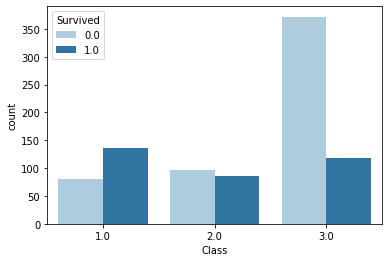

In [ ]:
sns.countplot(x="Class", hue = "Survived", data=data)

In [ ]:
data.isnull().sum() #lists the number of null values in each feature

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [ ]:
data.drop(["Hometown",
           "Age_wiki",
           "Name_wiki", 
           "Ticket",
           "Cabin",
           "Destination",
           "Body",
           "Class",
           "WikiId", 
           "Name","Boarded",
           "Lifeboat",
           "Name_wiki",
           "PassengerId"],axis=1, inplace= True)

In [ ]:
data.head(25)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S
5,0.0,3,male,NaN,0,0,8.4583,Q
6,0.0,1,male,54.0,0,0,51.8625,S
7,0.0,3,male,2.0,3,1,21.0750,S
8,1.0,3,female,27.0,0,2,11.1333,S
9,1.0,2,female,14.0,1,0,30.0708,C


In [ ]:
data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [ ]:
data.dropna(inplace=True) #drop all the data entries with missing values
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data.shape

(712, 8)

In [ ]:
data=data.replace(to_replace ="female",
                 value =1)
data=data.replace(to_replace ="male",
                 value =0)
data.drop(["Embarked","Parch","Fare"],axis=1, inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp
0,0.0,3,0,22.0,1
1,1.0,1,1,38.0,1
2,1.0,3,1,26.0,0
3,1.0,1,1,35.0,1
4,0.0,3,0,35.0,0


In [ ]:
print(data.loc[data["Survived"]==1])

     Survived  Pclass  Sex   Age  SibSp
1         1.0       1    1  38.0      1
2         1.0       3    1  26.0      0
3         1.0       1    1  35.0      1
8         1.0       3    1  27.0      0
9         1.0       2    1  14.0      1
..        ...     ...  ...   ...    ...
875       1.0       3    1  15.0      0
879       1.0       1    1  56.0      0
880       1.0       2    1  25.0      0
887       1.0       1    1  19.0      0
889       1.0       1    0  26.0      0

[288 rows x 5 columns]


# Model Training

In [ ]:
x=data.drop("Survived",axis=1) #features
y=data["Survived"] #target variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
#build the model and train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predic = model.predict(x_test)
report = classification_report(y_test,predic)
print(report)

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       122
         1.0       0.81      0.70      0.75        92

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



In [ ]:
accuracy_score(y_test, predic)

0.7990654205607477

# Would you survive?

In [ ]:
columns= x_train.columns
print(columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp'], dtype='object')


In [ ]:
a=int(input("Enter class: "))
b=int(input("Enter 1 if female else 0: "))
c=int(input("Enter Age: "))
d=int(input("Enter number of siblings: "))
l=[a,b,c,d]

Enter class: 2
Enter 1 if female else 0: 1
Enter Age: 12
Enter number of siblings: 2


In [ ]:
X = np.array([l])
p=int(model.predict(X))
prediction=["Dead","Survived"]
print(prediction[p])

Survived
